In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from keras.models import Sequential
import keras
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
#pip install tensorflow

In [3]:
#pip install pydot

In [4]:

#pip install graphviz

In [5]:
#pip install ann_visualizer

In [6]:
#pip install keras

In [7]:
#importing the banking data using pandas library
Banking_Data = pd.read_csv("C:/Users/aoogb/Desktop/BankData_new.csv", sep=',')
Banking_Data

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,sub_unsub
0,21323,7.000000,9458,1,13301,0,0.000000,0,0,22,8,205,2.000000,0.000000,0.000000,0
1,32936,4.898979,7597,2,23202,0,18.165902,1,1,5,5,326,1.000000,0.000000,0.000000,0
2,11656,7.280110,4154,2,6851,0,30.512293,0,0,27,6,159,1.414214,0.000000,0.000000,0
3,27803,6.324555,9732,2,23202,0,27.313001,1,1,2,2,241,1.000000,16.186414,1.732051,0
4,35916,7.211103,9458,2,13301,0,0.000000,1,0,13,5,179,1.732051,16.031220,2.449490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65547,43183,7.280110,9458,2,13301,0,24.145393,0,0,17,11,226,1.000000,13.564660,2.000000,1
65548,31957,7.071068,1579,0,13301,0,3.605551,1,0,20,4,76,1.000000,0.000000,0.000000,1
65549,32461,5.656854,5171,2,23202,0,0.000000,1,0,30,4,177,1.414214,0.000000,0.000000,1
65550,29739,6.855655,7597,2,23202,0,18.303005,0,0,17,2,226,1.000000,0.000000,0.000000,1


In [8]:
Banking_Data=Banking_Data.drop(['Unnamed: 0'], axis = 1)

In [9]:
Banking_Data

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,sub_unsub
0,7.000000,9458,1,13301,0,0.000000,0,0,22,8,205,2.000000,0.000000,0.000000,0
1,4.898979,7597,2,23202,0,18.165902,1,1,5,5,326,1.000000,0.000000,0.000000,0
2,7.280110,4154,2,6851,0,30.512293,0,0,27,6,159,1.414214,0.000000,0.000000,0
3,6.324555,9732,2,23202,0,27.313001,1,1,2,2,241,1.000000,16.186414,1.732051,0
4,7.211103,9458,2,13301,0,0.000000,1,0,13,5,179,1.732051,16.031220,2.449490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65547,7.280110,9458,2,13301,0,24.145393,0,0,17,11,226,1.000000,13.564660,2.000000,1
65548,7.071068,1579,0,13301,0,3.605551,1,0,20,4,76,1.000000,0.000000,0.000000,1
65549,5.656854,5171,2,23202,0,0.000000,1,0,30,4,177,1.414214,0.000000,0.000000,1
65550,6.855655,7597,2,23202,0,18.303005,0,0,17,2,226,1.000000,0.000000,0.000000,1


### scaling the columns for ANN by  sorting  columns btw zero and one the dataset in a machine learning format for Artificial neural networks

In [10]:

cols_to_scale = ['age','job','marital','education','balance','day','month','duration','campaign','pdays','previous']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Banking_Data[cols_to_scale] = scaler.fit_transform(Banking_Data[cols_to_scale])

## Split your Dataset into Trainning set and Test split

In [11]:

X = Banking_Data.drop('sub_unsub',axis='columns')
y = Banking_Data['sub_unsub']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [12]:
X.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,0.668619,0.968842,0.5,0.394471,0,0.000000,0,0,0.700000,0.636364,0.323344,0.151154,0.000000,0.000000
1,0.159153,0.757221,1.0,1.000000,0,0.312094,1,1,0.133333,0.363636,0.514196,0.000000,0.000000,0.000000
2,0.736542,0.365704,1.0,0.000000,0,0.524207,0,0,0.866667,0.454545,0.250789,0.062610,0.000000,0.000000
3,0.504834,1.000000,1.0,1.000000,0,0.469243,1,1,0.033333,0.090909,0.380126,0.000000,0.548456,0.104447
4,0.719809,0.968842,1.0,0.394471,0,0.000000,1,0,0.400000,0.363636,0.282334,0.110652,0.543197,0.147710


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: sub_unsub, dtype: int64

### Trainning Dataset  is 80% and Test Data Set is 20% of the Total DataSet 

In [14]:
X_train.shape

(52441, 14)

In [15]:
X_test.shape


(13111, 14)

In [16]:
y_train.shape

(52441,)

In [17]:
y_test.shape

(13111,)

In [18]:
X_train[:15]

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
26155,0.615838,0.365704,1.0,1.000000,0,0.392897,0,0,0.466667,0.363636,0.794953,0.110652,0.000000,0.000000
22014,0.446203,0.968842,1.0,0.394471,0,0.538100,0,0,0.700000,0.636364,0.212934,0.062610,0.000000,0.000000
48877,0.405785,0.481351,0.0,1.000000,0,0.565905,0,0,0.100000,0.090909,0.307571,0.219096,0.333716,0.208893
63442,0.364194,0.968842,1.0,0.394471,0,0.144763,0,0,0.833333,0.090909,0.528391,0.110652,0.342209,0.085280
25134,0.466002,1.000000,0.5,0.000000,0,0.000000,1,0,0.200000,0.363636,0.552050,0.062610,0.000000,0.000000
55651,0.231213,0.072891,0.5,0.394471,0,0.320032,0,0,0.166667,0.636364,0.607256,0.151154,0.000000,0.000000
41935,0.801946,0.757221,1.0,0.000000,0,0.998227,1,0,0.033333,0.454545,0.664038,0.062610,0.000000,0.000000
22588,0.736542,0.072891,0.5,1.000000,0,0.464501,0,0,0.666667,0.909091,0.395899,0.062610,0.000000,0.000000
20413,0.579688,0.757221,0.5,0.394471,0,0.435646,0,0,0.833333,0.363636,0.350158,0.110652,0.000000,0.000000
47133,0.405785,0.481351,1.0,1.000000,0,0.024296,1,0,0.566667,0.181818,0.305994,0.000000,0.000000,0.000000


### Building your Artificial neural network model

In [19]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(14, input_shape=(14,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)


Epoch 1/100
1639/1639 [==============================] - 2s 945us/step - loss: 0.5038 - accuracy: 0.7570
Epoch 2/100
1639/1639 [==============================] - 2s 966us/step - loss: 0.4562 - accuracy: 0.7863
Epoch 3/100
1639/1639 [==============================] - 1s 909us/step - loss: 0.4495 - accuracy: 0.7890
Epoch 4/100
1639/1639 [==============================] - 1s 909us/step - loss: 0.4451 - accuracy: 0.7925
Epoch 5/100
1639/1639 [==============================] - 1s 914us/step - loss: 0.4414 - accuracy: 0.7946
Epoch 6/100
1639/1639 [==============================] - 2s 945us/step - loss: 0.4374 - accuracy: 0.7975
Epoch 7/100
1639/1639 [==============================] - 2s 974us/step - loss: 0.4338 - accuracy: 0.7983
Epoch 8/100
1639/1639 [==============================] - 2s 936us/step - loss: 0.4315 - accuracy: 0.7997
Epoch 9/100
1639/1639 [==============================] - 2s 950us/step - loss: 0.4291 - accuracy: 0.8022
Epoch 10/100
1639/1639 [==============================]

In [ ]:

from ann_visualizer.visualize import ann_viz;




In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
ypred_model = model.predict(X_test)
ypred_model[:5]

y_pred = []
for element in ypred_model:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
y_pred[:10]

y_test[:10]


### evaluating the confusion matrix 

In [24]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      6554
           1       0.83      0.85      0.84      6557

    accuracy                           0.84     13111
   macro avg       0.84      0.84      0.84     13111
weighted avg       0.84      0.84      0.84     13111



410/410 [==============================] - 0s 757us/step - loss: 0.3681 - accuracy: 0.8357
accuracy =  [0.3681279420852661, 0.8357104659080505]


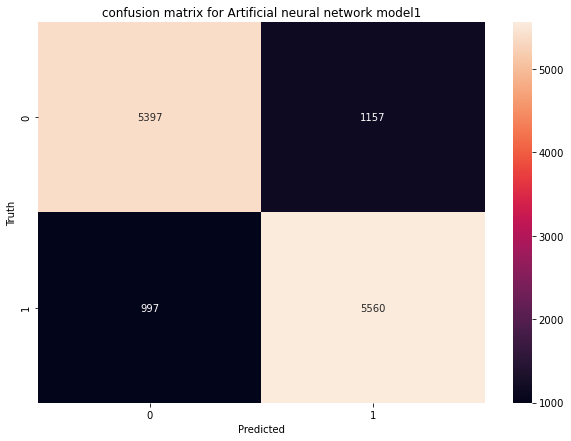

In [25]:

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('confusion matrix for Artificial neural network model1')
print('accuracy = ',model.evaluate(X_test, y_test))

In [26]:
from tensorflow import keras
model2 = keras.Sequential([
    keras.layers.Dense(14, input_shape=(14,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
1639/1639 [==============================] - 2s 911us/step - loss: 0.4992 - accuracy: 0.7576
Epoch 2/1000
1639/1639 [==============================] - 2s 946us/step - loss: 0.4628 - accuracy: 0.7825
Epoch 3/1000
1639/1639 [==============================] - 1s 864us/step - loss: 0.4598 - accuracy: 0.7848
Epoch 4/1000
1639/1639 [==============================] - 2s 936us/step - loss: 0.4546 - accuracy: 0.7878
Epoch 5/1000
1639/1639 [==============================] - 1s 888us/step - loss: 0.4498 - accuracy: 0.7903
Epoch 6/1000
1639/1639 [==============================] - 2s 939us/step - loss: 0.4477 - accuracy: 0.7927
Epoch 7/1000
1639/1639 [==============================] - 1s 861us/step - loss: 0.4460 - accuracy: 0.7940
Epoch 8/1000
1639/1639 [==============================] - 1s 868us/step - loss: 0.4449 - accuracy: 0.7943
Epoch 9/1000
1639/1639 [==============================] - 1s 883us/step - loss: 0.4445 - accuracy: 0.7939
Epoch 10/1000
1639/1639 [=====================

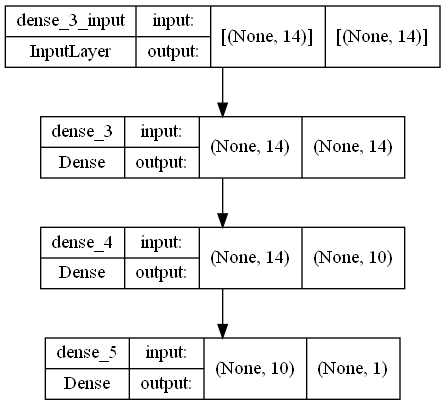

In [27]:
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [28]:
model2.evaluate(X_test, y_test)

410/410 [==============================] - 0s 732us/step - loss: 0.3326 - accuracy: 0.8562


[0.332551509141922, 0.8561513423919678]

In [29]:
ypred_model2 = model2.predict(X_test)
ypred_model2[:5]

y_prede = []
for element in ypred_model2:
    if element > 0.5:
        y_prede.append(1)
    else:
        y_prede.append(0)
        
y_prede[:10]

y_test[:10]


24750    0
12765    0
60707    1
16468    0
8105     0
8605     0
329      0
18996    0
52105    1
37223    1
Name: sub_unsub, dtype: int64

In [30]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_prede))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      6554
           1       0.84      0.89      0.86      6557

    accuracy                           0.86     13111
   macro avg       0.86      0.86      0.86     13111
weighted avg       0.86      0.86      0.86     13111



410/410 [==============================] - 0s 795us/step - loss: 0.3326 - accuracy: 0.8562
accuracy =  [0.332551509141922, 0.8561513423919678]


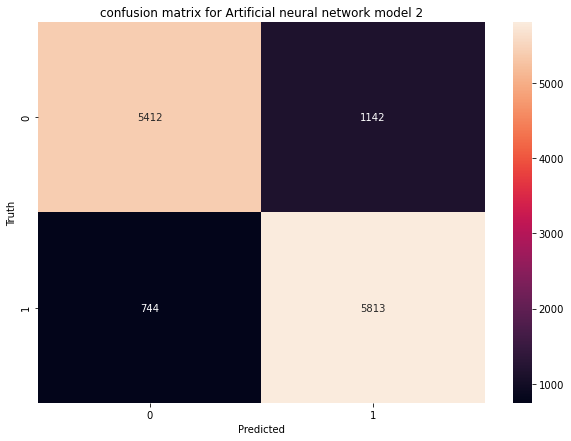

In [31]:

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prede)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('confusion matrix for Artificial neural network model 2')
print('accuracy = ', model2.evaluate(X_test, y_test))

In [32]:
from tensorflow import keras
model3 = keras.Sequential([
    keras.layers.Dense(14, input_shape=(14,), activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model3.fit(X_train, y_train, epochs=2000)

Epoch 1/2000
1639/1639 [==============================] - 2s 917us/step - loss: 0.5008 - accuracy: 0.7582
Epoch 2/2000
1639/1639 [==============================] - 2s 935us/step - loss: 0.4685 - accuracy: 0.7792
Epoch 3/2000
1639/1639 [==============================] - 2s 1ms/step - loss: 0.4624 - accuracy: 0.7819
Epoch 4/2000
1639/1639 [==============================] - 2s 1ms/step - loss: 0.4582 - accuracy: 0.7839
Epoch 5/2000
1639/1639 [==============================] - 2s 918us/step - loss: 0.4536 - accuracy: 0.7880
Epoch 6/2000
1639/1639 [==============================] - 1s 884us/step - loss: 0.4496 - accuracy: 0.7915
Epoch 7/2000
1639/1639 [==============================] - 2s 942us/step - loss: 0.4459 - accuracy: 0.7925
Epoch 8/2000
1639/1639 [==============================] - 1s 913us/step - loss: 0.4431 - accuracy: 0.7948
Epoch 9/2000
1639/1639 [==============================] - 2s 942us/step - loss: 0.4406 - accuracy: 0.7954
Epoch 10/2000
1639/1639 [=========================

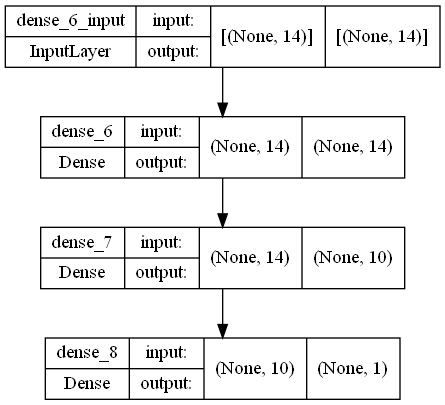

In [33]:
from keras.utils.vis_utils import plot_model
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [39]:
model3.evaluate(X_test, y_test)

410/410 [==============================] - 0s 746us/step - loss: 0.3429 - accuracy: 0.8569


[0.3428763747215271, 0.8569140434265137]

In [42]:
ypred_model3 = model3.predict(X_test)
ypred_model3[:5]

y_prede3 = []
for element in ypred_model2:
    if element > 0.5:
        y_prede3.append(1)
    else:
        y_prede3.append(0)
        
y_prede3[:10]

y_test[:10]

24750    0
12765    0
60707    1
16468    0
8105     0
8605     0
329      0
18996    0
52105    1
37223    1
Name: sub_unsub, dtype: int64

In [43]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_prede3))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      6554
           1       0.84      0.89      0.86      6557

    accuracy                           0.86     13111
   macro avg       0.86      0.86      0.86     13111
weighted avg       0.86      0.86      0.86     13111



410/410 [==============================] - 0s 804us/step - loss: 0.3429 - accuracy: 0.8569
accuracy =  [0.3428763747215271, 0.8569140434265137]


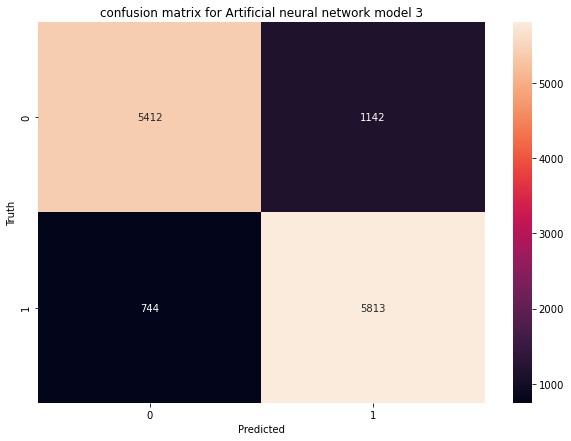

In [37]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prede3)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('confusion matrix for Artificial neural network model 3')
print('accuracy = ',model3.evaluate(X_test, y_test))

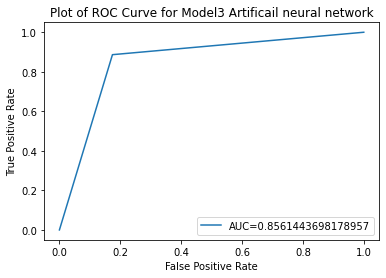

Confusion Matrix : 
 [[5412 1142]
 [ 744 5813]]
Accuracy :  0.8561513233162993
Sensitivity :  0.8257552639609399
Specificity :  0.8865334756748513


array([0.        , 0.88653348, 1.        ])

In [44]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


fpr, tpr, _ = metrics.roc_curve(y_test, y_prede3)
auc = metrics.roc_auc_score(y_test,y_prede3)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('Plot of ROC Curve for Model3 Artificail neural network')
plt.show()



cm1 = confusion_matrix(y_test,y_prede3)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
#false positive rate
fpr
#true positive rate 
tpr